In [92]:
%pip install numpy
%pip install pandas plotly


import pandas as pd
from datetime import datetime

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [93]:
# Import necessary libraries
import pandas as pd
import plotly.express as px

# Load the CSV data assuming 'data.csv' is your filename
data = pd.read_csv('128.csv')

# Step 1: Drop the first row (index 0 since we count from 0)
data = data.drop(index=0).reset_index(drop=True)
data = data.drop(index=0).reset_index(drop=True)

# Task 1: Count the number of participants in different groups
group_count = data['Group'].value_counts().reset_index()
group_count.columns = ['Group', 'count']  # Rename columns for clarity

# Create a bar plot for the number of participants by group
fig = px.bar(group_count, x='Group', y='count', color='Group',
             title="Number of Participants by Group",
             labels={"Group": "Group", "count": "Number of Participants"},
             text='count')  # Add values on top of bars

# Update layout to display values on top of bars
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()


In [94]:


# Task 2: Count how many participants are associated with each chart type
chart_type_count = data['ChartType'].value_counts().reset_index()
chart_type_count.columns = ['ChartType', 'count']  # Rename columns for clarity

# Create a bar plot of the ChartType counts
fig = px.bar(chart_type_count, x='ChartType', y='count', color='ChartType',
             title="Number of Participants by Chart Type",
             labels={"ChartType": "Chart Type", "count": "Number of Participants"},
             text='count')  # Add values on top of bars

# Update layout to display values on top of bars
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()


In [95]:
# get average familarity

# for all charts combined, convert to int first
data['Familiarity'] = data['Familiarity'].astype(int)
average_familiarity = data['Familiarity'].mean()
print(f"Average Familiarity: {average_familiarity:.2f}")


Average Familiarity: 2.09


In [96]:
# Task 3: Count the number of participants by Chart Type and Group
grouped_data = data.groupby(['ChartType', 'Group']).size().reset_index(name='count')

# Define the desired order for the Chart Types
desired_order = ['StackedArea', 'Waterfall', 'ButterflyChart', 'BubbleChart', 
                 'Histogram', 'BarChart', 'Heatmap', 'Sunburst']

# Ensure 'ChartType' in the DataFrame follows the desired order
grouped_data['ChartType'] = pd.Categorical(grouped_data['ChartType'], categories=desired_order, ordered=True)
grouped_data = grouped_data.sort_values('ChartType')

# Create a bar plot, grouping by ChartType and coloring by Group
fig = px.bar(grouped_data, x='ChartType', y='count', color='Group',
             title="Number of Participants by Chart Type and Group",
             labels={"ChartType": "Chart Type", "count": "Number of Participants", "Group": "Group"},
             barmode='group',  # 'group' makes bars side by side for each ChartType
             text='count')  # Add values on top of bars

# Update layout for better appearance of text on top of groups
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

In [97]:
# Calculate dominant VARK modality for each participant
vark_types = ['V', 'A', 'R', 'K']
vark_columns = [f'VARK {i}' for i in range(1, 17)]

# Function to determine the dominant VARK preference
def find_dominant_vark(row):
    vark_counts = {v: 0 for v in vark_types}
    for col in vark_columns:
        if col in row and pd.notna(row[col]):
            vark_values = str(row[col]).split(',')
            for v in vark_values:
                v = v.strip().upper()
                if v in vark_counts:
                    vark_counts[v] += 1
    max_count = max(vark_counts.values())
    dominant_varks = [v for v, count in vark_counts.items() if count == max_count]
    return dominant_varks[0] if dominant_varks else ''

# Apply the function to each row to compute dominant VARK preference
data['VARK'] = data.apply(find_dominant_vark, axis=1)

# Step 2: Visualization of VARK Learning Preferences

# Count the number of participants for each VARK learning preference
vark_count = data['VARK'].value_counts().reset_index()
vark_count.columns = ['VARK', 'count']  # Rename columns for clarity

# Create a bar plot of the VARK counts
fig = px.bar(vark_count, x='VARK', y='count', color='VARK',
             title="Number of Participants by VARK Learning Preference",
             labels={"VARK": "VARK Learning Preference", "count": "Number of Participants"},
             text='count')  # Add values on top of bars

# Update layout to display values on top of bars
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

In [98]:
import pandas as pd
import plotly.express as px



# Correctly parse the 'Age' column into numeric values
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')

# Convert the 'Gender' representation from numeric to categorical
data['Gender'] = data['Gender'].replace({'1': 'Male', '2': 'Female'})

# Define new age bins and labels
age_bins = [-float('inf'), 18, 30, 45, float('inf')]
age_labels = ['<18', '19-30', '30-45', '>45']

# Create 'AgeRange' based on the new bins
data['AgeRange'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)

# Group the data by 'AgeRange' and 'Gender', then count occurrences
grouped_data = data.groupby(['AgeRange', 'Gender']).size().reset_index(name='count')

# Create a bar plot with the updated age ranges
fig = px.bar(grouped_data, x='AgeRange', y='count', color='Gender',
             title="Number of Participants by Age Range and Gender",
             labels={"AgeRange": "Age Range", "count": "Number of Participants", "Gender": "Gender"},
             barmode='group')  # 'group' places bars for Male and Female side by side

# Show the plot
fig.show()

/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_87076/2610776664.py:20: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [99]:
# get mean and range of age

mean_age = data['Age'].mean()
min_age = data['Age'].min()
max_age = data['Age'].max()

print(f"Mean Age: {mean_age:.2f}")
print(f"Age Range: {min_age} - {max_age}")


Mean Age: 31.38
Age Range: 19 - 68


In [100]:
# Ensure the StartDate and EndDate columns are in datetime format
data['StartDate'] = pd.to_datetime(data['StartDate'])
data['EndDate'] = pd.to_datetime(data['EndDate'])

# Calculate the time difference in minutes
data['TimeSpent'] = (data['EndDate'] - data['StartDate']).dt.total_seconds() / 60  # Convert to minutes

# Group participants based on the time spent
def categorize_time(minutes):
    if minutes < 40:
        return '<40 min'
    elif 40 <= minutes <= 60:
        return '40-60 min'
    else:
        return '>60 min'

data['TimeCategory'] = data['TimeSpent'].apply(categorize_time)

# Now, we have a 'TimeCategory' column that groups participants by time spent
# To see the counts of each category:
time_category_counts = data['TimeCategory'].value_counts().reset_index()
time_category_counts.columns = ['TimeCategory', 'Count']

fig = px.bar(time_category_counts, x='TimeCategory', y='Count', 
             title="Time Spent by Participants", 
             labels={'TimeCategory': 'Time Category', 'Count': 'Number of Participants'},
             color='TimeCategory', color_discrete_sequence=px.colors.qualitative.Set1)

# Show the plot
fig.show()

In [101]:
group_1_data = data[data['Group'] == "1"]
group_2_data = data[data['Group'] == "2"]

def count_A_B_per_question(df, columns):
    # Create a dictionary to store counts for each question type
    counts = {col: {'Analogy': 0, 'Baseline': 0} for col in columns}
    
    for col in columns:
        counts[col]['Analogy'] = df[col].str.contains('A', na=False).sum()
        counts[col]['Baseline'] = df[col].str.contains('B', na=False).sum()
    
    return counts

# Columns for Group 1 (Understanding-AB, Effort-AB, Effectiveness-AB, Preference-AB)
group_1_columns = ['Understanding', 'MentalEffort', 'Effectiveness', 'Engagement']

# Count A/B for each question in Group 1
group_1_counts = count_A_B_per_question(group_1_data, group_1_columns)

# Prepare the data for plotting (convert counts into a DataFrame)
plot_data_group_1 = []

for question, counts in group_1_counts.items():
    plot_data_group_1.append({'Question': question, 'Response': 'Analogy', 'Count': counts['Analogy']})
    plot_data_group_1.append({'Question': question, 'Response': 'Baseline', 'Count': counts['Baseline']})

group_1_plot_df = pd.DataFrame(plot_data_group_1)

# Plot the bar chart for Group 1, showing Analogy vs Baseline for each question
fig_group_1 = px.bar(group_1_plot_df, x='Question', y='Count', color='Response', barmode='group',
                     title="Analogy vs Baseline Responses for Group 1",
                     labels={'Question': 'Question Type', 'Count': 'Number of Responses', 'Response': 'Response Type'},
                     color_discrete_map={'Analogy': 'blue', 'Baseline': 'red'})

fig_group_1.update_layout(xaxis_title="Question Type", yaxis_title="Count", barmode='group')

# Show the plot for Group 1
fig_group_1.show()

In [102]:
# Columns for Group 2 (Understanding-BA, Effort-BA, Effectiveness-BA, Preference-BA)
group_2_columns = ['Understanding', 'MentalEffort', 'Effectiveness', 'Engagement']

# Count A/B for each question in Group 2
group_2_counts = count_A_B_per_question(group_2_data, group_2_columns)

# Prepare the data for plotting (convert counts into a DataFrame)
plot_data_group_2 = []

for question, counts in group_2_counts.items():
    plot_data_group_2.append({'Question': question, 'Response': 'Analogy', 'Count': counts['Analogy']})
    plot_data_group_2.append({'Question': question, 'Response': 'Baseline', 'Count': counts['Baseline']})

group_2_plot_df = pd.DataFrame(plot_data_group_2)

# Plot the bar chart for Group 2, showing Analogy vs Baseline for each question
fig_group_2 = px.bar(group_2_plot_df, x='Question', y='Count', color='Response', barmode='group',
                     title="Analogy vs Baseline Responses for Group 2",
                     labels={'Question': 'Question Type', 'Count': 'Number of Responses', 'Response': 'Response Type'},
                     color_discrete_map={'Analogy': 'blue', 'Baseline': 'red'})

fig_group_2.update_layout(xaxis_title="Question Type", yaxis_title="Count", barmode='group')

# Show the plot for Group 2
fig_group_2.show()

In [103]:


# Sample data loading, ensure data is loaded correctly
# data = pd.read_csv('your_data.csv')


# Sample data loading, ensure data is loaded correctly
# data = pd.read_csv('your_data.csv')

# Function to calculate A/B percentages for each question
def calculate_A_B_percentages(df, columns):
    percentages = {col: {'Analogy': 0, 'Baseline': 0} for col in columns}
    for col in columns:
        total_responses = df[col].notna().sum()
        if total_responses > 0:
            percentages[col]['Analogy'] = (df[col].str.contains('A', na=False).sum() / total_responses) * 50
            percentages[col]['Baseline'] = (df[col].str.contains('B', na=False).sum() / total_responses) * 50
    return percentages

# Define columns for Group 1 and Group 2 (assuming the same here for simplicity)
columns = ['Understanding', 'MentalEffort', 'Effectiveness', 'Engagement']

# Calculate percentage for each question in Group 1 and Group 2
group_1_percentages = calculate_A_B_percentages(data[data['Group'] == "1"], columns)
group_2_percentages = calculate_A_B_percentages(data[data['Group'] == "2"], columns)

# Prepare combined data for plotting
plot_data_combined = []

def prepare_plot_data(group_percentages, group_name):
    for question, percentages in group_percentages.items():
        plot_data_combined.append({'Question': question, 'Response': 'Analogy', 'Percentage': percentages['Analogy'], 'Group': group_name})
        plot_data_combined.append({'Question': question, 'Response': 'Baseline', 'Percentage': percentages['Baseline'], 'Group': group_name})

prepare_plot_data(group_1_percentages, 'Group 1')
prepare_plot_data(group_2_percentages, 'Group 2')

combined_plot_df = pd.DataFrame(plot_data_combined)

# Plot the horizontal stacked bar chart with percentages
fig = px.bar(combined_plot_df, y='Question', x='Percentage', color='Response', orientation='h', 
             title="Analogy vs Baseline Responses for Both Groups (Percentage)",
             labels={'Question': 'Question Type', 'Percentage': 'Percentage of Responses (%)', 'Response': 'Response Type'},
             color_discrete_map={'Analogy': 'blue', 'Baseline': 'red'})

# Update layout to make the chart horizontal stacked
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total descending'})

# Show the plot
fig.show()







In [104]:
# from scipy.stats import ttest_ind

df = pd.DataFrame(plot_data_combined)

def perform_t_test(question):
    analogy = df[(df['Question'] == question) & (df['Response'] == 'Analogy')]['Percentage']
    baseline = df[(df['Question'] == question) & (df['Response'] == 'Baseline')]['Percentage']
    t_stat, p_val = ttest_ind(analogy, baseline, equal_var=False)  # Use Welch's t-test if variances are unequal
    return t_stat, p_val

# List of questions
questions = df['Question'].unique()

# Perform t-tests for each question
t_test_results = {}
for question in questions:
    t_stat, p_val = perform_t_test(question)
    t_test_results[question] = {'t_stat': t_stat, 'p_val': p_val}
    print(f"Question: {question}, t-statistic: {t_stat}, p-value: {p_val}")


NameError: name 'ttest_ind' is not defined

In [221]:
import plotly.express as px

# Assuming 'data' is your DataFrame containing the ratings
# Ensure the ratings columns are numeric
data['Interpretation_1'] = pd.to_numeric(data['Interpretation_1'], errors='coerce')
data['Context_1'] = pd.to_numeric(data['Context_1'], errors='coerce')
data['DataRelationship_1'] = pd.to_numeric(data['DataRelationship_1'], errors='coerce')

# Define all possible ratings
all_ratings = range(1, 8)  # Ratings from 1 to 7 inclusive

# Calculate counts of each rating for each variable
interpretation_counts = data['Interpretation_1'].value_counts().sort_index().reindex(all_ratings, fill_value=0)
context_counts = data['Context_1'].value_counts().sort_index().reindex(all_ratings, fill_value=0)
data_relationship_counts = data['DataRelationship_1'].value_counts().sort_index().reindex(all_ratings, fill_value=0)

# Create a DataFrame with these counts
counts_df = pd.DataFrame({
    'Interpretation': interpretation_counts,
    'Context': context_counts,
    'Data Relationship': data_relationship_counts
}).transpose().reset_index().rename(columns={'index': 'Variable'})

# Reshape the DataFrame for plotting
long_df = counts_df.melt(id_vars=['Variable'], value_vars=[1, 2, 3, 4, 5, 6, 7],
                         var_name='Rating', value_name='Count')

# Ensure 'Rating' is treated as a categorical variable with the correct order
long_df['Rating'] = long_df['Rating'].astype(int).astype(str)
long_df['Rating'] = pd.Categorical(long_df['Rating'], categories=[str(i) for i in range(1, 8)], ordered=True)

# Define a color sequence with 7 distinct colors
color_sequence = px.colors.qualitative.Pastel  # Or any other color sequence with 7 colors

# Create the stacked bar chart
fig = px.bar(long_df, x='Variable', y='Count', color='Rating',
             title="Strongly Disagree (1) - Strongly Agree (7)",
             labels={'Variable': '', 'Count': 'Number of Ratings'},
             width=800, height=600,
             color_discrete_sequence=color_sequence)

fig.update_layout(barmode='stack')

# Show the figure
fig.show()


In [222]:
import pandas as pd
import plotly.express as px

# Assuming 'data' is your DataFrame already loaded with relevant data

# Step 1: Construct the dataset with the required columns
processed_data = []

for index, row in data.iterrows():
    participant_id = row['PROLIFIC_PID']
    group = row['Group']

    # Ensure numeric conversion with error handling
    comprehension_a = pd.to_numeric(row['Comprehension-A_12'], errors='coerce')
    understanding_a = pd.to_numeric(row['Understanding-A_12'], errors='coerce')
    confidence_a = pd.to_numeric(row['Confidence-A_12'], errors='coerce')
    comprehension_b = pd.to_numeric(row['Comprehension-B_12'], errors='coerce')
    understanding_b = pd.to_numeric(row['Understanding-B_12'], errors='coerce')
    confidence_b = pd.to_numeric(row['Confidence-B_12'], errors='coerce')

    # Analogy data (denoted with 'A')
    analogy_entry = {
        'ParticipantID': participant_id,
        'VisualizationTechnique': 'Analogy',
        'Order': 'first' if (group == '1') else 'second',
        'Comprehension': comprehension_a,
        'Understanding': understanding_a,
        'Confidence': confidence_a
    }
    processed_data.append(analogy_entry)

    # Baseline data (denoted with 'B')
    baseline_entry = {
        'ParticipantID': participant_id,
        'VisualizationTechnique': 'Baseline',
        'Order': 'first' if (group == '2') else 'second',
        'Comprehension': comprehension_b,
        'Understanding': understanding_b,
        'Confidence': confidence_b
    }
    processed_data.append(baseline_entry)

# Create a DataFrame
processed_df = pd.DataFrame(processed_data)

print(processed_df.head())

# Ensure all relevant columns are numeric
processed_df[['Comprehension', 'Understanding', 'Confidence']] = processed_df[['Comprehension', 'Understanding', 'Confidence']].apply(pd.to_numeric)

# Step 2: Calculate mean and standard deviation for each visualization technique
# Manually calculate mean and std for comprehension, understanding, and confidence per technique
mean_std_comprehension = processed_df.groupby('VisualizationTechnique')['Comprehension'].agg(['mean', 'std']).reset_index()
mean_std_understanding = processed_df.groupby('VisualizationTechnique')['Understanding'].agg(['mean', 'std']).reset_index()
mean_std_confidence = processed_df.groupby('VisualizationTechnique')['Confidence'].agg(['mean', 'std']).reset_index()

# Print the results
print("Mean and Standard Deviation for Comprehension by VisualizationTechnique:")
print(mean_std_comprehension)
print("\nMean and Standard Deviation for Understanding by VisualizationTechnique:")
print(mean_std_understanding)
print("\nMean and Standard Deviation for Confidence by VisualizationTechnique:")
print(mean_std_confidence)

# Print the results
print("Mean and Standard Deviation for Each Visualization Technique:")
# print(mean_std_output)

# Step 3: Create boxplots for each of the perceptions, side by side for Analogy and Baseline
attributes = ['Comprehension', 'Understanding', 'Confidence']
for attr in attributes:
    fig = px.box(processed_df, x='VisualizationTechnique', y=attr, color='VisualizationTechnique',
                 title=f'Boxplot for {attr}',
                 labels={attr: attr, 'VisualizationTechnique': 'Technique'},
                 color_discrete_map={'Analogy': 'blue', 'Baseline': 'red'})
    fig.show()

              ParticipantID VisualizationTechnique   Order  Comprehension  \
0  60f47600a931759ef3d1a505                Analogy  second              6   
1  60f47600a931759ef3d1a505               Baseline   first              3   
2  6604674670aaf5b1fd5fa623                Analogy  second              4   
3  6604674670aaf5b1fd5fa623               Baseline   first              5   
4  66d70f8a63fd78797e0776e1                Analogy  second              5   

   Understanding  Confidence  
0              6           6  
1              5           4  
2              4           2  
3              5           5  
4              3           5  
Mean and Standard Deviation for Comprehension by VisualizationTechnique:
  VisualizationTechnique      mean       std
0                Analogy  5.484375  1.143171
1               Baseline  5.156250  1.394237

Mean and Standard Deviation for Understanding by VisualizationTechnique:
  VisualizationTechnique      mean       std
0                Analogy

In [223]:
import pandas as pd
import plotly.express as px

# Assuming 'data' is your DataFrame already loaded with relevant data
# Construct the dataset with the required columns
perception_data = []

for index, row in data.iterrows():
    participant_id = row['PROLIFIC_PID']
    group = row['Group']

    # Collecting perception responses, ensuring they are cast to numeric
    try:
        analogy_entry = {
            'ParticipantID': participant_id,
            'VisualizationTechnique': 'Analogy',
            'Order': 'first' if (group == '1') else 'second',
            'Comprehension': float(row['Comprehension-A_12']),
            'Understanding': float(row['Understanding-A_12']),
            'Confidence': float(row['Confidence-A_12'])
        }
        baseline_entry = {
            'ParticipantID': participant_id,
            'VisualizationTechnique': 'Baseline',
            'Order': 'first' if (group == '2') else 'second',
            'Comprehension': float(row['Comprehension-B_12']),
            'Understanding': float(row['Understanding-B_12']),
            'Confidence': float(row['Confidence-B_12'])
        }
        perception_data.extend([analogy_entry, baseline_entry])
    except ValueError:
        print(f"Non-numeric data detected for participant {participant_id}. Skipping this participant.")

# Create a DataFrame
perception_df = pd.DataFrame(perception_data)

# Ensure all relevant columns are numeric
perception_df[['Comprehension', 'Understanding', 'Confidence']] = perception_df[['Comprehension', 'Understanding', 'Confidence']].apply(pd.to_numeric, errors='coerce')

# Calculate mean and std for each perception factor by technique and order
mean_std_comprehension = perception_df.groupby(['VisualizationTechnique', 'Order'])['Comprehension'].agg(['mean', 'std']).reset_index()
mean_std_understanding = perception_df.groupby(['VisualizationTechnique', 'Order'])['Understanding'].agg(['mean', 'std']).reset_index()
mean_std_confidence = perception_df.groupby(['VisualizationTechnique', 'Order'])['Confidence'].agg(['mean', 'std']).reset_index()

# Print the results
print("Mean and Standard Deviation for Comprehension by Visualization Technique and Order:")
print(mean_std_comprehension)
print("\nMean and Standard Deviation for Understanding by Visualization Technique and Order:")
print(mean_std_understanding)
print("\nMean and Standard Deviation for Confidence by Visualization Technique and Order:")
print(mean_std_confidence)

# Create boxplots for each of the perception metrics, showing both order and technique
perception_attributes = ['Comprehension', 'Understanding', 'Confidence']
for attr in perception_attributes:
    fig = px.box(perception_df, x='Order', y=attr, color='VisualizationTechnique',
                 title=f'Boxplot for {attr} by Visualization Technique and Order',
                 labels={attr: attr, 'Order': 'Order', 'VisualizationTechnique': 'Technique'},
                 color_discrete_map={'Analogy': 'blue', 'Baseline': 'red'},
                 category_orders={'Order': ['first', 'second']})
    fig.show()


Mean and Standard Deviation for Comprehension by Visualization Technique and Order:
  VisualizationTechnique   Order      mean       std
0                Analogy   first  5.640625  1.044520
1                Analogy  second  5.328125  1.222211
2               Baseline   first  4.968750  1.208025
3               Baseline  second  5.343750  1.545282

Mean and Standard Deviation for Understanding by Visualization Technique and Order:
  VisualizationTechnique   Order      mean       std
0                Analogy   first  5.406250  1.399759
1                Analogy  second  4.796875  1.524193
2               Baseline   first  4.968750  1.458078
3               Baseline  second  4.984375  1.419727

Mean and Standard Deviation for Confidence by Visualization Technique and Order:
  VisualizationTechnique   Order      mean       std
0                Analogy   first  5.437500  1.206793
1                Analogy  second  5.031250  1.583333
2               Baseline   first  4.906250  1.256333
3      

/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_83104/597046240.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




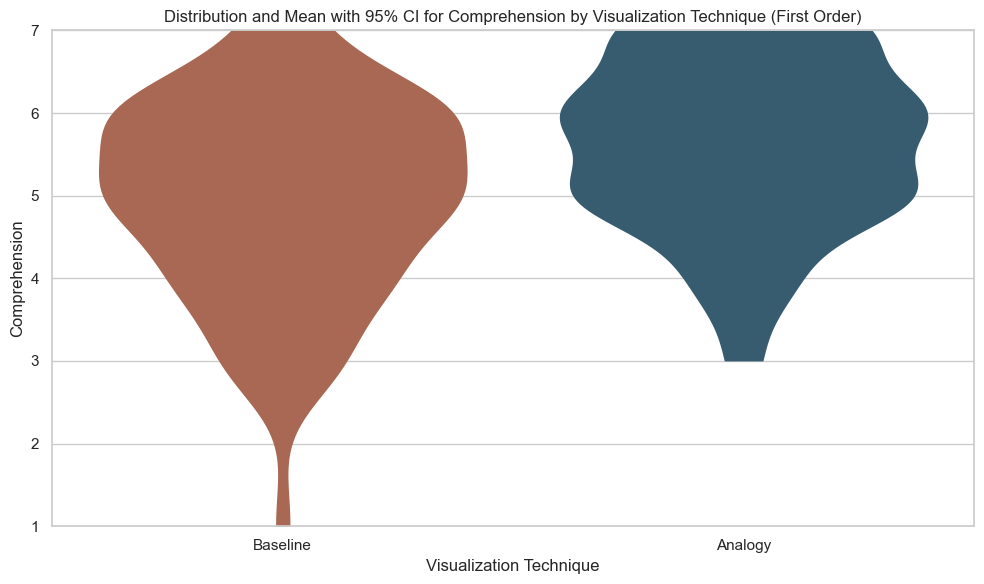

/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_83104/597046240.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




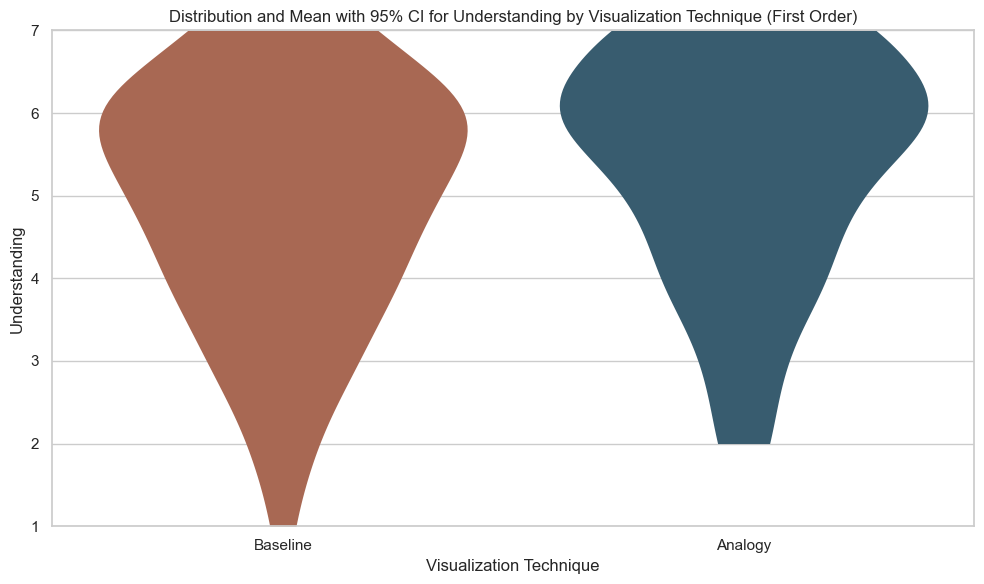

/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_83104/597046240.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




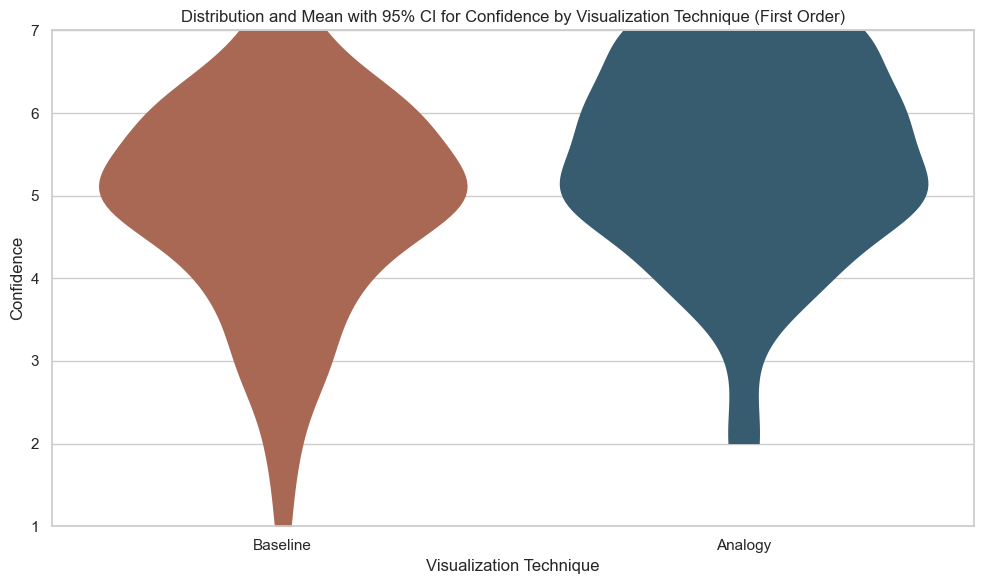

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'perception_df' is your DataFrame with necessary columns

# Filter for the 'first' order data only
first_order_data = perception_df[perception_df['Order'] == 'first']

# Define the specific colors you want to use for the two techniques
custom_colors = ['#b66145', '#2f5f78']  # replace with your preferred color codes

# Configure the aesthetics of seaborn
sns.set(style="whitegrid")

# Iterate over each perception attribute to create individual plots
for attr in ['Comprehension', 'Understanding', 'Confidence']:
    plt.figure(figsize=(10, 6))
    
    # Create a violin plot for distribution
    sns.violinplot(
        data=first_order_data,
        x='VisualizationTechnique',
        y=attr,
        palette=custom_colors,
        inner=None,  # Hide the inner box plot
        linewidth=0,
        cut=0       # Do not cut the tails of the violins
    )
    
    # Overlay with a point plot for mean and CI
    # sns.pointplot(
    #     data=first_order_data,
    #     x='VisualizationTechnique',
    #     y=attr,
    #     ci=95,         # 95% confidence intervals
    #     markers='o',   # Use circles for markers
    #     capsize=0.1,   # Size of the cap on error bars
    #     join=False,    # Do not join points with lines
    #     color='black', # Ensure point plot is distinct
    #     dodge=0.4      # Adjust dodge for clarity
    # )
    
    # Configure plot aesthetics
    plt.title(f'Distribution and Mean with 95% CI for {attr} by Visualization Technique (First Order)')
    plt.xlabel('Visualization Technique')
    plt.ylabel(attr)
    plt.ylim(1, 7)  # Set y-axis limits to [1, 7]

    plt.legend([],[], frameon=False)  # Hide redundant legends
    plt.tight_layout()
    plt.show()

In [263]:
# calculate the mean and 95 ci for each technique on first order

import numpy as np
from scipy.stats import sem
from statsmodels.stats.api import DescrStatsW

# Define a function to calculate the mean and 95% CI
def mean_confidence_interval(data, confidence=0.95):
    # Calculate the mean
    mean = np.mean(data)
    
    # Calculate the standard error of the mean
    se = sem(data)
    
    # Calculate the confidence interval
    ci = DescrStatsW(data).tconfint_mean(alpha=1-confidence)
    
    return mean, ci

# Filter the data for the 'first' order and 'Analogy' technique
first_order_analogy_data = first_order_data[first_order_data['VisualizationTechnique'] == 'Analogy']

# Calculate the mean and 95% CI for each perception attribute

for attr in ['Comprehension', 'Understanding', 'Confidence']:
    mean, ci = mean_confidence_interval(first_order_analogy_data[attr])
    print(f"{attr}: Mean = {mean:.2f}, 95% CI = {ci}")
    
# Filter the data for the 'first' order and 'Baseline' technique

first_order_baseline_data = first_order_data[first_order_data['VisualizationTechnique'] == 'Baseline']

# Calculate the mean and 95% CI for each perception attribute
for attr in ['Comprehension', 'Understanding', 'Confidence']:
    mean, ci = mean_confidence_interval(first_order_baseline_data[attr])
    print(f"{attr}: Mean = {mean:.2f}, 95% CI = {ci}")

Comprehension: Mean = 5.64, 95% CI = (np.float64(5.3797116915786045), np.float64(5.9015383084213955))
Understanding: Mean = 5.41, 95% CI = (np.float64(5.056600592687969), np.float64(5.755899407312031))
Confidence: Mean = 5.44, 95% CI = (np.float64(5.136052092042671), np.float64(5.738947907957329))
Comprehension: Mean = 4.97, 95% CI = (np.float64(4.666994230269203), np.float64(5.270505769730797))
Understanding: Mean = 4.97, 95% CI = (np.float64(4.604532900104534), np.float64(5.332967099895466))
Confidence: Mean = 4.91, 95% CI = (np.float64(4.592427313240689), np.float64(5.220072686759311))


In [224]:
%pip install --upgrade numpy scipy
from scipy.stats import ttest_ind

Note: you may need to restart the kernel to use updated packages.


In [241]:
# comparing baseline in different order

print(len(processed_df))  # Ensure the sample sizes are equal


group1_baseline = processed_df[(processed_df['Order'] == 'first') & (processed_df['VisualizationTechnique'] == 'Baseline')]
group2_baseline = processed_df[(processed_df['Order'] == 'second') & (processed_df['VisualizationTechnique'] == 'Baseline')]

print(len(group1_baseline), len(group2_baseline))  # Ensure the sample sizes are equal

# phase 1
# Perform t-tests for each cognitive load component
for component in ['Comprehension', 'Understanding', 'Confidence']:
    t_stat, p_val = ttest_ind(group1_baseline[component], group2_baseline[component], equal_var=False)  # assume unequal variances
    print(f'{component} - t-statistic: {t_stat}, p-value: {p_val}')

256
64 64
Comprehension - t-statistic: -1.5294934391835144, p-value: 0.12879466010814403
Understanding - t-statistic: -0.061422153974459465, p-value: 0.9511204011227006
Confidence - t-statistic: -0.5858698021193046, p-value: 0.5590326430354464


In [ ]:
# get the average for 

In [225]:

print(len(processed_df))  # Ensure the sample sizes are equal

# Extract data for Phase 1's standalone comparison
group1_baseline = processed_df[(processed_df['Order'] == 'first') & (processed_df['VisualizationTechnique'] == 'Baseline')]
group2_analogy = processed_df[(processed_df['Order'] == 'first') & (processed_df['VisualizationTechnique'] == 'Analogy')]

print(len(group1_baseline), len(group2_analogy))  # Ensure the sample sizes are equal

# phase 1
# Perform t-tests for each cognitive load component
for component in ['Comprehension', 'Understanding', 'Confidence']:
    t_stat, p_val = ttest_ind(group1_baseline[component], group2_analogy[component], equal_var=False)  # assume unequal variances
    print(f'{component} - t-statistic: {t_stat}, p-value: {p_val}')


256
64 64
Comprehension - t-statistic: -3.3657264243417933, p-value: 0.0010180007379528666
Understanding - t-statistic: -1.731630151628838, p-value: 0.08579100622580803
Confidence - t-statistic: -2.4396608534981934, p-value: 0.016095142298175328


In [226]:
# post exposure, phase 2
group1_analogy_after_baseline = processed_df[(processed_df['Order'] == 'second') & (processed_df['VisualizationTechnique'] == 'Analogy')]
group2_baseline_after_analogy = processed_df[(processed_df['Order'] == 'second') & (processed_df['VisualizationTechnique'] == 'Baseline')]


# Perform t-tests for each cognitive load component
for component in ['Comprehension', 'Understanding', 'Confidence']:
    t_stat, p_val = ttest_ind(group1_analogy_after_baseline[component], group2_baseline_after_analogy[component], equal_var=False)  # assume unequal variances
    print(f'{component} - t-statistic: {t_stat}, p-value: {p_val}')

Comprehension - t-statistic: -0.06344526694436965, p-value: 0.9495178114341605
Understanding - t-statistic: -0.7201234603192751, p-value: 0.4727894273581096
Confidence - t-statistic: -0.05818156784057202, p-value: 0.9536968577186924


In [227]:
group1_analogy = processed_df[(processed_df['VisualizationTechnique'] == 'Analogy')]
group2_baseline = processed_df[(processed_df['VisualizationTechnique'] == 'Baseline')]


# Perform t-tests for each cognitive load component
for component in ['Comprehension', 'Understanding', 'Confidence']:
    t_stat, p_val = ttest_ind(group1_analogy[component], group2_baseline[component], equal_var=False)  # assume unequal variances
    print(f'{component} - t-statistic: {t_stat}, p-value: {p_val}')

Comprehension - t-statistic: 2.0589855983087504, p-value: 0.04055454136968842
Understanding - t-statistic: 0.6841844694859507, p-value: 0.4944833482676906
Confidence - t-statistic: 1.4881479207523312, p-value: 0.13795485361595416


In [228]:
import pandas as pd
import plotly.express as px

# Assuming 'data' is your DataFrame already loaded with relevant data
# Construct the dataset with the required columns
cognitive_load_data = []

for index, row in data.iterrows():
    participant_id = row['PROLIFIC_PID']
    group = row['Group']

    # Collecting cognitive load responses, ensuring they are cast to numeric
    try:
        analogy_entry = {
            'ParticipantID': participant_id,
            'VisualizationTechnique': 'Analogy',
            'Order': 'first' if (group == '1') else 'second',
            'MentalDemand': float(row['Mental Demand-A_12']),
            'TemporalDemand': float(row['Temporal Demand-A_12']),
            'Effort': float(row['Effort-A_12']),
            'Frustration': float(row['Frustration-A_12'])
        }
        baseline_entry = {
            'ParticipantID': participant_id,
            'VisualizationTechnique': 'Baseline',
            'Order': 'first' if (group == '2') else 'second',
            'MentalDemand': float(row['Mental Demand-B_12']),
            'TemporalDemand': float(row['Temporal Demand-B_12']),
            'Effort': float(row['Effort-B_12']),
            'Frustration': float(row['Frustration-B_12'])
        }
        cognitive_load_data.extend([analogy_entry, baseline_entry])
    except ValueError:
        print(f"Non-numeric data detected for participant {participant_id}. Skipping this participant.")

# Create a DataFrame
cognitive_load_df = pd.DataFrame(cognitive_load_data)

# Ensure all relevant columns are numeric
cognitive_load_df[['MentalDemand', 'TemporalDemand', 'Effort', 'Frustration']] = cognitive_load_df[['MentalDemand', 'TemporalDemand', 'Effort', 'Frustration']].apply(pd.to_numeric, errors='coerce')

# Manually calculate mean and std for each cognitive load factor per technique
mean_std_mental_demand = cognitive_load_df.groupby('VisualizationTechnique')['MentalDemand'].agg(['mean', 'std']).reset_index()
mean_std_temporal_demand = cognitive_load_df.groupby('VisualizationTechnique')['TemporalDemand'].agg(['mean', 'std']).reset_index()
mean_std_effort = cognitive_load_df.groupby('VisualizationTechnique')['Effort'].agg(['mean', 'std']).reset_index()
mean_std_frustration = cognitive_load_df.groupby('VisualizationTechnique')['Frustration'].agg(['mean', 'std']).reset_index()

# Print the results
print("Mean and Standard Deviation for Mental Demand by VisualizationTechnique:")
print(mean_std_mental_demand)
print("\nMean and Standard Deviation for Temporal Demand by VisualizationTechnique:")
print(mean_std_temporal_demand)
print("\nMean and Standard Deviation for Effort by VisualizationTechnique:")
print(mean_std_effort)
print("\nMean and Standard Deviation for Frustration by VisualizationTechnique:")
print(mean_std_frustration)

# Step 3: Create boxplots for each of the cognitive load factors, side by side for Analogy and Baseline
cognitive_load_attributes = ['MentalDemand', 'TemporalDemand', 'Effort', 'Frustration']
for attr in cognitive_load_attributes:
    fig = px.box(cognitive_load_df, x='VisualizationTechnique', y=attr, color='VisualizationTechnique',
                 title=f'Boxplot for {attr}',
                 labels={attr: attr, 'VisualizationTechnique': 'Technique'},
                 color_discrete_map={'Analogy': 'blue', 'Baseline': 'red'})
    fig.show()


Mean and Standard Deviation for Mental Demand by VisualizationTechnique:
  VisualizationTechnique      mean       std
0                Analogy  3.648438  1.718770
1               Baseline  4.281250  1.582072

Mean and Standard Deviation for Temporal Demand by VisualizationTechnique:
  VisualizationTechnique      mean       std
0                Analogy  2.460938  1.285304
1               Baseline  3.039062  1.399676

Mean and Standard Deviation for Effort by VisualizationTechnique:
  VisualizationTechnique      mean       std
0                Analogy  4.523438  1.743220
1               Baseline  5.046875  1.494659

Mean and Standard Deviation for Frustration by VisualizationTechnique:
  VisualizationTechnique      mean       std
0                Analogy  2.609375  1.443063
1               Baseline  3.335938  1.642340


/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_83104/2799131635.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




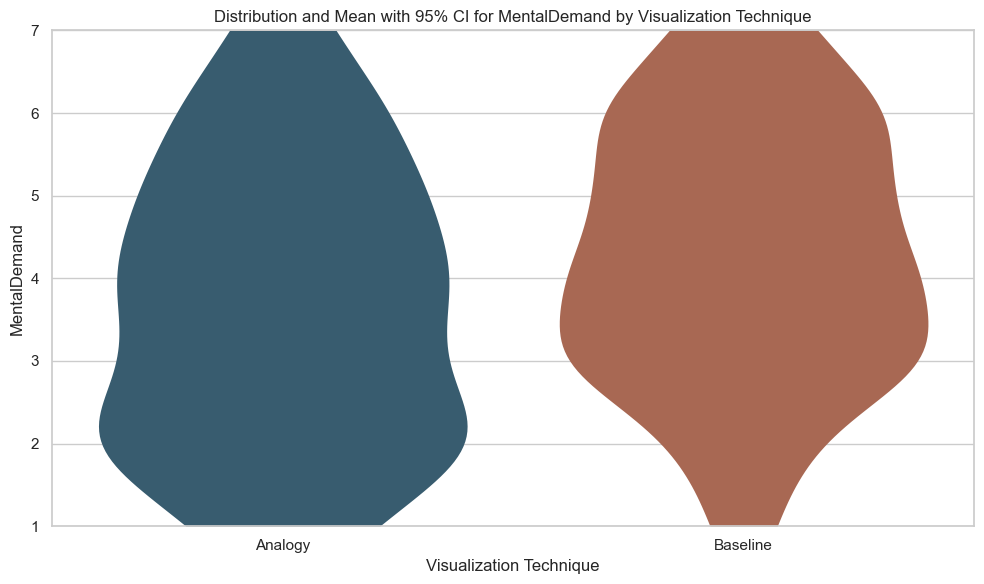

/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_83104/2799131635.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




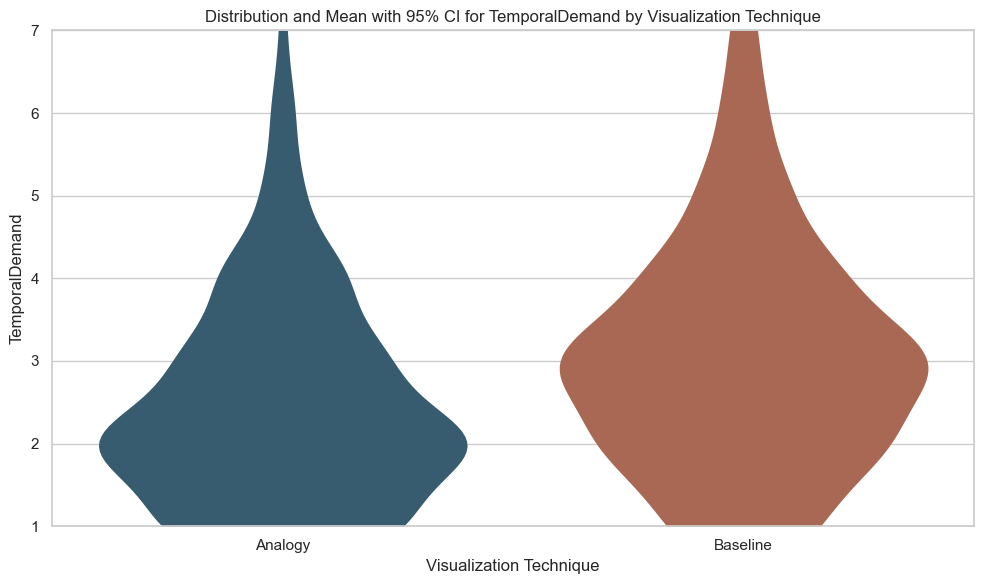

/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_83104/2799131635.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




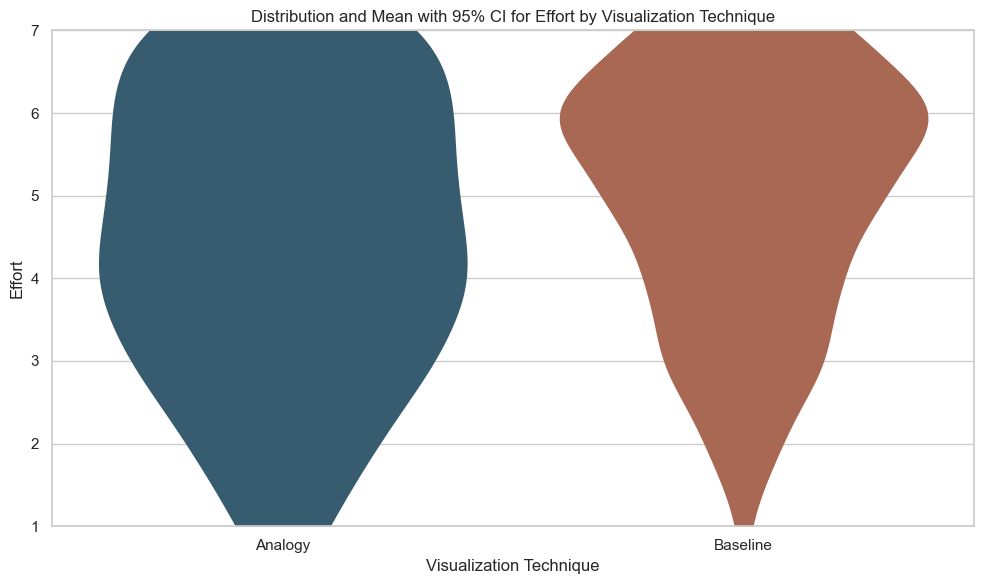

/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_83104/2799131635.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




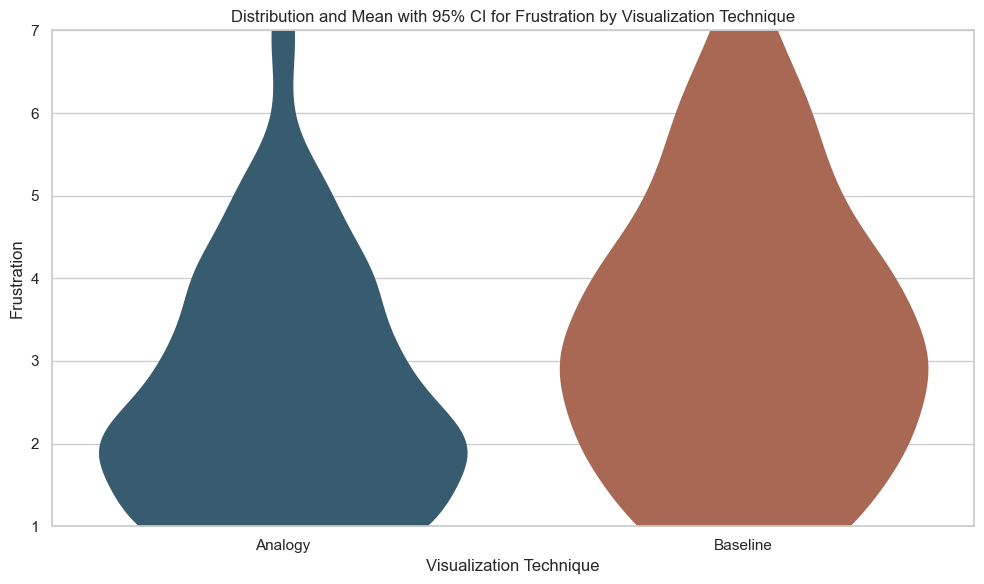

In [262]:
# plot the violin plot

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cognitive_load_df' is your DataFrame with necessary columns
custom_colors = ['#2f5f78', '#b66145']  # replace with your preferred color codes

# Configure the aesthetics of seaborn
sns.set(style="whitegrid")

# Iterate over each cognitive load attribute to create individual plots
for attr in ['MentalDemand', 'TemporalDemand', 'Effort', 'Frustration']:
    plt.figure(figsize=(10, 6))
    
    # Create a violin plot for distribution
    sns.violinplot(
        data=cognitive_load_df,
        x='VisualizationTechnique',
        y=attr,
        palette=custom_colors,
        inner=None,  # Hide the inner box plot
        linewidth=0,
        cut=0       # Do not cut the tails of the violins
    )
    
    # Overlay with a point plot for mean and CI
    # sns.pointplot(
    #     data=cognitive_load_df,
    #     x='VisualizationTechnique',
    #     y=attr,
    #     ci=95,         # 95% confidence intervals
    #     markers='o',   # Use circles for markers
    #     capsize=0.1,   # Size of the cap on error bars
    #     join=False,    # Do not join points with lines
    #     color='black', # Ensure point plot is distinct
    #     dodge=0.4      # Adjust dodge for clarity
    # )
    
    # Configure plot aesthetics
    plt.title(f'Distribution and Mean with 95% CI for {attr} by Visualization Technique')
    plt.xlabel('Visualization Technique')
    plt.ylabel(attr)
    plt.ylim(1, 7)  # Set y-axis limits to [1, 7]

    plt.legend([],[], frameon=False)  # Hide redundant legends
    plt.tight_layout()
    plt.show()

In [266]:
# calculate the mean and 95 ci for each technique 

import numpy as np
from scipy.stats import sem
from statsmodels.stats.api import DescrStatsW

# Define a function to calculate the mean and 95% CI
def mean_confidence_interval(data, confidence=0.95):
    # Calculate the mean
    mean = np.mean(data)
    
    # Calculate the standard error of the mean
    se = sem(data)
    
    # Calculate the confidence interval
    ci = DescrStatsW(data).tconfint_mean(alpha=1-confidence)
    
    return mean, ci

# Filter the data for 'Analogy' technique

analogy_data = cognitive_load_df[cognitive_load_df['VisualizationTechnique'] == 'Analogy']

# Calculate the mean and 95% CI for each cognitive load attribute

for attr in ['MentalDemand', 'Effort', 'Frustration']:
    mean, ci = mean_confidence_interval(analogy_data[attr])
    print(f"{attr}: Mean = {mean:.2f}, 95% CI = {ci}")
    
# Filter the data for 'Baseline' technique

baseline_data = cognitive_load_df[cognitive_load_df['VisualizationTechnique'] == 'Baseline']

# Calculate the mean and 95% CI for each cognitive load attribute

for attr in ['MentalDemand', 'Effort', 'Frustration']:
    mean, ci = mean_confidence_interval(baseline_data[attr])
    print(f"{attr}: Mean = {mean:.2f}, 95% CI = {ci}")
    


MentalDemand: Mean = 3.65, 95% CI = (np.float64(3.347816716483868), np.float64(3.949058283516132))
Effort: Mean = 4.52, 95% CI = (np.float64(4.218540298916388), np.float64(4.828334701083612))
Frustration: Mean = 2.61, 95% CI = (np.float64(2.356976642142593), np.float64(2.861773357857407))
MentalDemand: Mean = 4.28, 95% CI = (np.float64(4.004538295016685), np.float64(4.557961704983315))
Effort: Mean = 5.05, 95% CI = (np.float64(4.7854522597739795), np.float64(5.3082977402260205))
Frustration: Mean = 3.34, 95% CI = (np.float64(3.0486846798763536), np.float64(3.6231903201236464))


In [236]:
cognitive_load_data = []

for index, row in data.iterrows():
    participant_id = row['PROLIFIC_PID']
    group = row['Group']

    # Collecting cognitive load responses, ensuring they are cast to numeric
    try:
        analogy_entry = {
            'ParticipantID': participant_id,
            'VisualizationTechnique': 'Analogy',
            'Order': 'first' if (group == '1') else 'second',
            'MentalDemand': float(row['Mental Demand-A_12']),
            'TemporalDemand': float(row['Temporal Demand-A_12']),
            'Effort': float(row['Effort-A_12']),
            'Frustration': float(row['Frustration-A_12'])
        }
        baseline_entry = {
            'ParticipantID': participant_id,
            'VisualizationTechnique': 'Baseline',
            'Order': 'first' if (group == '2') else 'second',
            'MentalDemand': float(row['Mental Demand-B_12']),
            'TemporalDemand': float(row['Temporal Demand-B_12']),
            'Effort': float(row['Effort-B_12']),
            'Frustration': float(row['Frustration-B_12'])
        }
        cognitive_load_data.extend([analogy_entry, baseline_entry])
    except ValueError:
        print(f"Non-numeric data detected for participant {participant_id}. Skipping this participant.")

# Create a DataFrame
cognitive_load_df = pd.DataFrame(cognitive_load_data)

# Ensure all relevant columns are numeric
cognitive_load_df[['MentalDemand', 'TemporalDemand', 'Effort', 'Frustration']] = cognitive_load_df[['MentalDemand', 'TemporalDemand', 'Effort', 'Frustration']].apply(pd.to_numeric, errors='coerce')

# Manually calculate mean and std for each cognitive load factor per technique
mean_std_mental_demand = cognitive_load_df.groupby('VisualizationTechnique')['MentalDemand'].agg(['mean', 'std']).reset_index()
mean_std_temporal_demand = cognitive_load_df.groupby('VisualizationTechnique')['TemporalDemand'].agg(['mean', 'std']).reset_index()
mean_std_effort = cognitive_load_df.groupby('VisualizationTechnique')['Effort'].agg(['mean', 'std']).reset_index()
mean_std_frustration = cognitive_load_df.groupby('VisualizationTechnique')['Frustration'].agg(['mean', 'std']).reset_index()

# Print the results
print("Mean and Standard Deviation for Mental Demand by VisualizationTechnique:")
print(mean_std_mental_demand)
print("\nMean and Standard Deviation for Temporal Demand by VisualizationTechnique:")
print(mean_std_temporal_demand)
print("\nMean and Standard Deviation for Effort by VisualizationTechnique:")
print(mean_std_effort)
print("\nMean and Standard Deviation for Frustration by VisualizationTechnique:")
print(mean_std_frustration)

# Step 3: Create boxplots for each of the cognitive load factors, side by side for Analogy and Baseline
cognitive_load_attributes = ['MentalDemand', 'TemporalDemand', 'Effort', 'Frustration']
for attr in cognitive_load_attributes:
    # Add points='all' to include all data points
    fig = px.box(cognitive_load_df, x='VisualizationTechnique', y=attr, color='VisualizationTechnique',
                 title=f'Boxplot for {attr}',
                 labels={attr: attr, 'VisualizationTechnique': 'Technique'},
                 color_discrete_map={'Analogy': 'blue', 'Baseline': 'red'},
                 points='all')  # Show all data points
    fig.show()


Mean and Standard Deviation for Mental Demand by VisualizationTechnique:
  VisualizationTechnique      mean       std
0                Analogy  3.648438  1.718770
1               Baseline  4.281250  1.582072

Mean and Standard Deviation for Temporal Demand by VisualizationTechnique:
  VisualizationTechnique      mean       std
0                Analogy  2.460938  1.285304
1               Baseline  3.039062  1.399676

Mean and Standard Deviation for Effort by VisualizationTechnique:
  VisualizationTechnique      mean       std
0                Analogy  4.523438  1.743220
1               Baseline  5.046875  1.494659

Mean and Standard Deviation for Frustration by VisualizationTechnique:
  VisualizationTechnique      mean       std
0                Analogy  2.609375  1.443063
1               Baseline  3.335938  1.642340


In [240]:
# Calculate mean and standard deviation for each cognitive load factor per technique
mean_std_data = {
    'MentalDemand': cognitive_load_df.groupby('VisualizationTechnique')['MentalDemand'].agg(['mean', 'std']).reset_index(),
    'TemporalDemand': cognitive_load_df.groupby('VisualizationTechnique')['TemporalDemand'].agg(['mean', 'std']).reset_index(),
    'Effort': cognitive_load_df.groupby('VisualizationTechnique')['Effort'].agg(['mean', 'std']).reset_index(),
    'Frustration': cognitive_load_df.groupby('VisualizationTechnique')['Frustration'].agg(['mean', 'std']).reset_index()
}

# Plotting average with error bars for each attribute
for attr, df in mean_std_data.items():
    fig = px.bar(df, x='VisualizationTechnique', y='mean',
                 error_y='std',  # Use std for error bars
                 title=f'Average {attr} with Error Bars',
                 labels={'mean': f'Mean {attr}', 'VisualizationTechnique': 'Technique'},
                 color='VisualizationTechnique',
                 color_discrete_map={'Analogy': 'blue', 'Baseline': 'red'})
    
    fig.update_layout(yaxis_title=f'Mean {attr}')
    fig.show()


In [244]:
# get the mean and std printed

# Calculate mean and standard deviation for each cognitive load factor per technique
mean_std_data = {
    'MentalDemand': cognitive_load_df.groupby('VisualizationTechnique')['MentalDemand'].agg(['mean', 'std']).reset_index(),
    'TemporalDemand': cognitive_load_df.groupby('VisualizationTechnique')['TemporalDemand'].agg(['mean', 'std']).reset_index(),
    'Effort': cognitive_load_df.groupby('VisualizationTechnique')['Effort'].agg(['mean', 'std']).reset_index(),
    'Frustration': cognitive_load_df.groupby('VisualizationTechnique')['Frustration'].agg(['mean', 'std']).reset_index()
}

# Print the results
for attr, df in mean_std_data.items():
    print(f"Mean and Standard Deviation for {attr} by Visualization Technique:")
    print(df)
    print("\n")
    

Mean and Standard Deviation for MentalDemand by Visualization Technique:
  VisualizationTechnique      mean       std
0                Analogy  3.648438  1.718770
1               Baseline  4.281250  1.582072


Mean and Standard Deviation for TemporalDemand by Visualization Technique:
  VisualizationTechnique      mean       std
0                Analogy  2.460938  1.285304
1               Baseline  3.039062  1.399676


Mean and Standard Deviation for Effort by Visualization Technique:
  VisualizationTechnique      mean       std
0                Analogy  4.523438  1.743220
1               Baseline  5.046875  1.494659


Mean and Standard Deviation for Frustration by Visualization Technique:
  VisualizationTechnique      mean       std
0                Analogy  2.609375  1.443063
1               Baseline  3.335938  1.642340




In [229]:
import pandas as pd

# Assume your data is in a DataFrame called 'df'
# Columns: 'ParticipantID', 'Group', 'Order', 'Technique', 'MentalDemand', 'TemporalDemand', 'Effort', 'Frustration'

# Calculate descriptive statistics for each phase and technique
cognitive_load_stats = cognitive_load_df.groupby(['Order', 'VisualizationTechnique'])[['MentalDemand', 'TemporalDemand', 'Effort', 'Frustration']].agg(['mean', 'std'])
print(cognitive_load_stats)


                              MentalDemand           TemporalDemand            \
                                      mean       std           mean       std   
Order  VisualizationTechnique                                                   
first  Analogy                    3.906250  1.752266       2.500000  1.247219   
       Baseline                   4.359375  1.693753       3.281250  1.516771   
second Analogy                    3.390625  1.658238       2.421875  1.331006   
       Baseline                   4.203125  1.471202       2.796875  1.236735   

                                 Effort           Frustration            
                                   mean       std        mean       std  
Order  VisualizationTechnique                                            
first  Analogy                 4.625000  1.750283    2.734375  1.428088  
       Baseline                5.359375  1.384348    3.468750  1.652019  
second Analogy                 4.421875  1.743966    2.484375 

In [230]:



from scipy.stats import ttest_ind




In [231]:

print(len(cognitive_load_df))  # Ensure the sample sizes are equal

# Extract data for Phase 1's standalone comparison
group1_baseline = cognitive_load_df[(cognitive_load_df['Order'] == 'first') & (cognitive_load_df['VisualizationTechnique'] == 'Baseline')]
group2_analogy = cognitive_load_df[(cognitive_load_df['Order'] == 'first') & (cognitive_load_df['VisualizationTechnique'] == 'Analogy')]

print(len(group1_baseline), len(group2_analogy))  # Ensure the sample sizes are equal

# Perform t-tests for each cognitive load component
for component in ['MentalDemand', 'TemporalDemand', 'Effort', 'Frustration']:
    t_stat, p_val = ttest_ind(group1_baseline[component], group2_analogy[component], equal_var=False)  # assume unequal variances
    print(f'{component} - t-statistic: {t_stat}, p-value: {p_val}')


256
64 64
MentalDemand - t-statistic: 1.4874511627973215, p-value: 0.1393968591153093
TemporalDemand - t-statistic: 3.1827535636579065, p-value: 0.0018528131328897461
Effort - t-statistic: 2.6326740508465716, p-value: 0.009589005919850825
Frustration - t-statistic: 2.690372217393525, p-value: 0.0081259534344084


In [232]:
group1_analogy_after_baseline = cognitive_load_df[(cognitive_load_df['Order'] == 'second') & (cognitive_load_df['VisualizationTechnique'] == 'Analogy')]
group2_baseline_after_analogy = cognitive_load_df[(cognitive_load_df['Order'] == 'second') & (cognitive_load_df['VisualizationTechnique'] == 'Baseline')]

# Fill missing values
for component in ['MentalDemand', 'TemporalDemand', 'Effort', 'Frustration']:
    group1_analogy_after_baseline[component].fillna(group1_analogy_after_baseline[component].mean(), inplace=True)
    group2_baseline_after_analogy[component].fillna(group2_baseline_after_analogy[component].mean(), inplace=True)

# Perform t-tests
for component in ['MentalDemand', 'TemporalDemand', 'Effort', 'Frustration']:
    t_stat, p_val = ttest_ind(group1_analogy_after_baseline[component], group2_baseline_after_analogy[component], equal_var=False)
    print(f'{component} (Post-Exposure) - t-statistic: {t_stat}, p-value: {p_val}')


# Extract data for Phase 2's post-exposure comparison
# group1_analogy_after_baseline = cognitive_load_df[(cognitive_load_df['Order'] == 'second') & (cognitive_load_df['VisualizationTechnique'] == 'Analogy')]
# group2_baseline_after_analogy = cognitive_load_df[(cognitive_load_df['Order'] == 'second') & (cognitive_load_df['VisualizationTechnique'] == 'Baseline')]

# # Perform t-tests for each cognitive load component
# for component in ['MentalDemand', 'TemporalDemand', 'Effort', 'Frustration']:
#     t_stat, p_val = ttest_ind(group1_analogy_after_baseline[component], group2_baseline_after_analogy[component], equal_var=False)
#     print(f'{component} (Post-Exposure) - t-statistic: {t_stat}, p-value: {p_val}')

MentalDemand (Post-Exposure) - t-statistic: -2.932159150307054, p-value: 0.004008594574989349
TemporalDemand (Post-Exposure) - t-statistic: -1.6511726589038607, p-value: 0.10120699126683569
Effort (Post-Exposure) - t-statistic: -1.0728468082851739, p-value: 0.2854198845237622
Frustration (Post-Exposure) - t-statistic: -2.624748049924296, p-value: 0.009758207881628522


/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_83104/3725272119.py:6: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_83104/3725272119.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_83104/3725272119.py:7: FutureW

In [233]:

# Group data by VisualizationTechnique without considering order
analogy_group = cognitive_load_df[cognitive_load_df['VisualizationTechnique'] == 'Analogy']
baseline_group = cognitive_load_df[cognitive_load_df['VisualizationTechnique'] == 'Baseline']


# Print counts to ensure sample sizes
print(f"Analogy Group Size: {len(analogy_group)}, Baseline Group Size: {len(baseline_group)}")

# Perform t-tests for each cognitive load component
cognitive_load_components = ['MentalDemand', 'TemporalDemand', 'Effort', 'Frustration']

# Check group sizes
print(f"Analogy Group Size: {len(analogy_group)}, Baseline Group Size: {len(baseline_group)}")
if len(analogy_group) == 0 or len(baseline_group) == 0:
    raise ValueError("One of the groups is empty. Check your filtering criteria.")

# Fill missing values and ensure data is numeric
for component in cognitive_load_components:
    analogy_group[component] = pd.to_numeric(analogy_group[component], errors='coerce')
    baseline_group[component] = pd.to_numeric(baseline_group[component], errors='coerce')
    
    analogy_group[component].fillna(analogy_group[component].mean(), inplace=True)
    baseline_group[component].fillna(baseline_group[component].mean(), inplace=True)

# Perform t-tests
for component in cognitive_load_components:
    t_stat, p_val = ttest_ind(analogy_group[component], baseline_group[component], equal_var=False)
    print(f'{component} - t-statistic: {t_stat}, p-value: {p_val}')


Analogy Group Size: 128, Baseline Group Size: 128
Analogy Group Size: 128, Baseline Group Size: 128
MentalDemand - t-statistic: -3.0647717930246157, p-value: 0.0024148877974135697
TemporalDemand - t-statistic: -3.4419703997915883, p-value: 0.0006758736448420934
Effort - t-statistic: -2.5789816285596134, p-value: 0.010485958934711328
Frustration - t-statistic: -3.759906925550715, p-value: 0.0002117214488688088


/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_83104/2510161360.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_83104/2510161360.py:20: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/s3/gx423dyd2hg9sfb092jr70f00000gn/T/ipykernel_83104/2510161360.py:22: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. 

In [234]:
import pandas as pd
import plotly.express as px

# Assuming 'data' is your DataFrame already loaded with relevant data
# Construct the dataset with the required columns
cognitive_load_data = []

for index, row in data.iterrows():
    participant_id = row['PROLIFIC_PID']
    group = row['Group']

    # Collecting cognitive load responses, ensuring they are cast to numeric
    try:
        analogy_entry = {
            'ParticipantID': participant_id,
            'VisualizationTechnique': 'Analogy',
            'Order': 'first' if (group == '1') else 'second',
            'MentalDemand': float(row['Mental Demand-A_12']),
            'TemporalDemand': float(row['Temporal Demand-A_12']),
            'Effort': float(row['Effort-A_12']),
            'Frustration': float(row['Frustration-A_12'])
        }
        baseline_entry = {
            'ParticipantID': participant_id,
            'VisualizationTechnique': 'Baseline',
            'Order': 'first' if (group == '2') else 'second',
            'MentalDemand': float(row['Mental Demand-B_12']),
            'TemporalDemand': float(row['Temporal Demand-B_12']),
            'Effort': float(row['Effort-B_12']),
            'Frustration': float(row['Frustration-B_12'])
        }
        cognitive_load_data.extend([analogy_entry, baseline_entry])
    except ValueError:
        print(f"Non-numeric data detected for participant {participant_id}. Skipping this participant.")

# Create a DataFrame
cognitive_load_df = pd.DataFrame(cognitive_load_data)

# Ensure all relevant columns are numeric
cognitive_load_df[['MentalDemand', 'TemporalDemand', 'Effort', 'Frustration']] = cognitive_load_df[['MentalDemand', 'TemporalDemand', 'Effort', 'Frustration']].apply(pd.to_numeric, errors='coerce')

# Manually calculate mean and std for each cognitive load factor per technique
mean_std_mental_demand = cognitive_load_df.groupby(['VisualizationTechnique', 'Order'])['MentalDemand'].agg(['mean', 'std']).reset_index()
mean_std_temporal_demand = cognitive_load_df.groupby(['VisualizationTechnique', 'Order'])['TemporalDemand'].agg(['mean', 'std']).reset_index()
mean_std_effort = cognitive_load_df.groupby(['VisualizationTechnique', 'Order'])['Effort'].agg(['mean', 'std']).reset_index()
mean_std_frustration = cognitive_load_df.groupby(['VisualizationTechnique', 'Order'])['Frustration'].agg(['mean', 'std']).reset_index()

# Print the results
print("Mean and Standard Deviation for Mental Demand by Visualization Technique and Order:")
print(mean_std_mental_demand)
print("\nMean and Standard Deviation for Temporal Demand by Visualization Technique and Order:")
print(mean_std_temporal_demand)
print("\nMean and Standard Deviation for Effort by Visualization Technique and Order:")
print(mean_std_effort)
print("\nMean and Standard Deviation for Frustration by Visualization Technique and Order:")
print(mean_std_frustration)

# Step 3: Create boxplots for each of the cognitive load factors, showing both order and technique
cognitive_load_attributes = ['MentalDemand', 'TemporalDemand', 'Effort', 'Frustration']
for attr in cognitive_load_attributes:
    fig = px.box(cognitive_load_df, x='Order', y=attr, color='VisualizationTechnique',
                 title=f'Boxplot for {attr} by Visualization Technique and Order',
                 labels={attr: attr, 'Order': 'Order', 'VisualizationTechnique': 'Technique'},
                 color_discrete_map={'Analogy': 'blue', 'Baseline': 'red'},
                 category_orders={'Order': ['first', 'second']})
    fig.show()


Mean and Standard Deviation for Mental Demand by Visualization Technique and Order:
  VisualizationTechnique   Order      mean       std
0                Analogy   first  3.906250  1.752266
1                Analogy  second  3.390625  1.658238
2               Baseline   first  4.359375  1.693753
3               Baseline  second  4.203125  1.471202

Mean and Standard Deviation for Temporal Demand by Visualization Technique and Order:
  VisualizationTechnique   Order      mean       std
0                Analogy   first  2.500000  1.247219
1                Analogy  second  2.421875  1.331006
2               Baseline   first  3.281250  1.516771
3               Baseline  second  2.796875  1.236735

Mean and Standard Deviation for Effort by Visualization Technique and Order:
  VisualizationTechnique   Order      mean       std
0                Analogy   first  4.625000  1.750283
1                Analogy  second  4.421875  1.743966
2               Baseline   first  5.359375  1.384348
3        